# Question 2: 線形計画法 (2)

=============================================================================================

問題）変数 x と y が次の条件を満たすとき、  
(1) x+y が最大となる x と y のそれぞれ浮動小数点と整数の組み合わせを求めよ。  
(2) x+y が最小となる x と y の正の整数の組み合わせを求めよ。  

＜条件＞  
4 x + y <= 12  
0.5 x + y <=4  

数理最適化のライブラリー CVXPY を用いて解きなさい。

=============================================================================================

(1) ライブラリー pulp を用いて、浮動小数点での目的関数 (x + y) が最大になるようにといてみましょう。

In [ ]:
import cvxpy as cp  # conda install -c conda-forge cvxpy

In [ ]:
# 変数の定義
x = cp.Variable()
y = cp.Variable()

# 制約条件の定義
constraints = [-4*x + 12 >= y,
               -1/2*x+4 >= y]

# 目的関数の定義
obj = cp.Maximize(x + y)

# 問題の定義
prob = cp.Problem(obj, constraints)

In [ ]:
print(prob)

maximize var0 + var1
subject to var1 <= -4.0 @ var0 + 12.0
           var1 <= -0.5 @ var0 + 4.0


In [ ]:
# 解く
prob.solve()  # Returns the optimal value.
print("status:", prob.status)

status: optimal


解けた場合は「Optimal」と出力されます。

In [ ]:
# 結果表示
print("optimal value", prob.value)
print("x:",x.value)
print("y:",y.value)

optimal value 5.1428571425007945
x: 2.285714285411661
y: 2.857142857089133


当然のことながら pulp で解いた値と同じです。  
＜pulp結果＞  
x: 2.2857143  
y: 2.8571429

次に整数解を解きます。

In [ ]:
# 変数の定義
x = cp.Variable(integer=True) # 整数として定義
y = cp.Variable(integer=True)

# 制約条件の定義
constraints = [-4*x + 12 >= y,
               -1/2*x+4 >= y]

# 目的関数の定義
obj = cp.Maximize(x + y)

# 問題の定義
prob = cp.Problem(obj, constraints)

In [ ]:
# 解く
prob.solve()  # Returns the optimal value.
print("status:", prob.status)

Long-step dual simplex will be used
status: optimal


In [ ]:
# 結果表示
print("optimal value", prob.value)
print("x:",x.value)
print("y:",y.value)

optimal value 5.0
x: 2.0
y: 3.0


=============================================================================================

(2) 次に目的関数が最小になる場合を解いてみましょう。

In [ ]:
# 変数の定義
x = cp.Variable()
y = cp.Variable()

# 制約条件の定義
constraints = [-4*x + 12 >= y,
               -1/2*x+4 >= y]

# 目的関数の定義
obj = cp.Minimize(x + y)

# 問題の定義
prob = cp.Problem(obj, constraints)

In [ ]:
print(prob)

minimize var70 + var71
subject to var71 <= -4.0 @ var70 + 12.0
           var71 <= -0.5 @ var70 + 4.0


In [ ]:
# 解く
prob.solve()  # Returns the optimal value.
print("status:", prob.status)

status: unbounded


最適解がないときには「Unbounted」と出力されます。

In [ ]:
# 結果表示
print("x:",x.value)
print("y:",y.value)

x: None
y: None


解がない場合は pulp と違って None と出力されます。

=============================================================================================

# 解説

制約条件と目的変数を表すグラフを描いてみましょう。

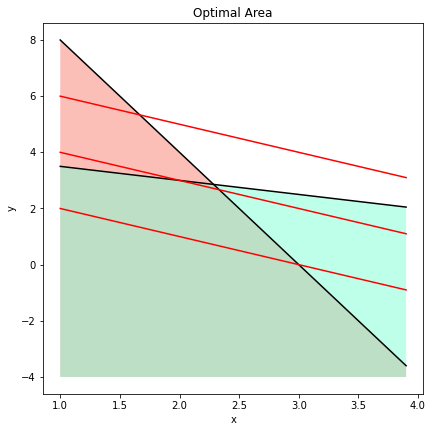

In [ ]:
# http://www.sakutyuu.com/technology/?p=1935
# https://cranethree.hatenablog.com/entry/2015/07/25/204608
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

# 描画範囲の指定
x = np.arange(1, 4, 0.1)

# 計算式
y1 = -4*x + 12
y2 = -0.5*x + 4
y3 = -4

y4 = -x + 7
y5 = -x + 5
y6 = -x + 3


fig = plt.figure(figsize=(15, 15), facecolor="w")
ax = fig.add_subplot(2, 2, 1, title="Optimal Area")

# 横軸の変数。縦軸の変数。
ax.plot(x, y1, color="black")
ax.plot(x, y2, color="black")
ax.plot(x, y4, color="red")
ax.plot(x, y5, color="red")
ax.plot(x, y6, color="red")

ax.fill_between(x, y1, y3, where=y1>y3, facecolor='salmon', alpha=0.5)
ax.fill_between(x, y2, y3, where=y2>y3, facecolor='aquamarine',alpha=0.5)
 
# ラベルの描画
plt.xlabel("x")
plt.ylabel("y")
 
# 描画実行
plt.show()

２つの制約条件を満たすの領域（左したの緑色の領域）と、目的関数の x + y = a の aの値を 3, 5, 7 と変化した直線を赤線で描いてみました。  
一番上の x + y = 7 では目的関数の赤線が緑の領域を通らないので、x + y は 7 よりも小さいことがわかります。  
その下の２つの赤線は緑の領域を通っているので、両方共制約条件は満たしていますね。  
その中で目的関数が最大値を満たすのは、３本の線のなかでは真ん中の x + y = 5 となり、実際にこれが x, y が整数のときの解になっています。  
最小値は、x + y = 3 以外にも緑色の領域にいくらでも線を引けるので解がないということになります。  
最小値問題に x, y ともに正の整数という制約条件を付け加えたらどうなるでしょうか？

In [ ]:
# 変数の定義
x = cp.Variable(integer=True) # 整数として定義
y = cp.Variable(integer=True)

# 制約条件の定義
constraints = [-4*x + 12 >= y,
               -1/2*x+4 >= y,
              x >=1, y >=1] # x,yが1以上の制約条件追加

# 目的関数の定義
obj = cp.Maximize(x + y)

# 問題の定義
prob = cp.Problem(obj, constraints)

In [ ]:
# 解く
prob.solve()  # Returns the optimal value.
print("status:", prob.status)

status: optimal
Long-step dual simplex will be used


In [ ]:
# 結果表示
print("x:",x.value)
print("y:",y.value)

x: 2.0
y: 3.0


今回は解が出ました！